In [18]:
import pandas as pd
xls = pd.ExcelFile('dataset11.xlsx')
print("Sheets found:", xls.sheet_names)
df = pd.read_excel(xls, sheet_name=xls.sheet_names[0])
df.to_csv('dataset11.csv', index=False)
print("Saved dataset11.csv")


Sheets found: ['Sheet1']
Saved dataset11.csv


In [19]:
import pandas as pd

df = pd.read_csv('dataset11.csv')
print(df.head())
print(df.shape)
df['Smoker'] = df['Smoker'].astype(int)
df['Pre_Existing_Conditions'] = df['Pre_Existing_Conditions'].astype(int)
df['Gender'] = df['Gender'].astype(int)
# ML Features
X = df[['Age', 'BMI', 'Smoker', 'Pre_Existing_Conditions', 'Annual_Income']]
y = df['Monthly_Premium']


   oi  Age  Gender   BMI  Smoker  Alcohol_Consumption  Annual_Income  \
0   1   48       0  26.2       1                    1         561000   
1   2   19       1  27.6       0                    1         753502   
2   3   66       0  21.4       0                    0         848496   
3   4   73       0  25.6       0                    1         686423   
4   5   63       1  25.0       0                    1         630685   

     Region  Predicted_Insurance_Cost  Monthly_Premium  \
0     Urban                    133172             1194   
1     Urban                    207453             2018   
2     Rural                    254371             1546   
3  Suburban                    175596             1502   
4     Rural                    206620             2073   

   Pre_Existing_Conditions         Recommended_Policy Recommended_Provider  \
0                        1          HealthGain Policy            Niva Bupa   
1                        0               ReAssure 2.0         

                oi          Age       Gender          BMI       Smoker  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean    500.500000    47.476000     0.546000    24.091000     0.258000   
std     288.819436    17.976891     0.576382     3.266382     0.437753   
min       1.000000    18.000000     0.000000    18.500000     0.000000   
25%     250.750000    32.750000     0.000000    21.300000     0.000000   
50%     500.500000    47.000000     1.000000    24.000000     0.000000   
75%     750.250000    62.000000     1.000000    26.900000     1.000000   
max    1000.000000    79.000000     2.000000    29.900000     1.000000   

       Alcohol_Consumption  Annual_Income  Predicted_Insurance_Cost  \
count          1000.000000    1000.000000                1000.00000   
mean              0.298000  588867.664000              179414.63900   
std               0.457608  109239.751793               42873.84602   
min               0.000000  301292.000000        

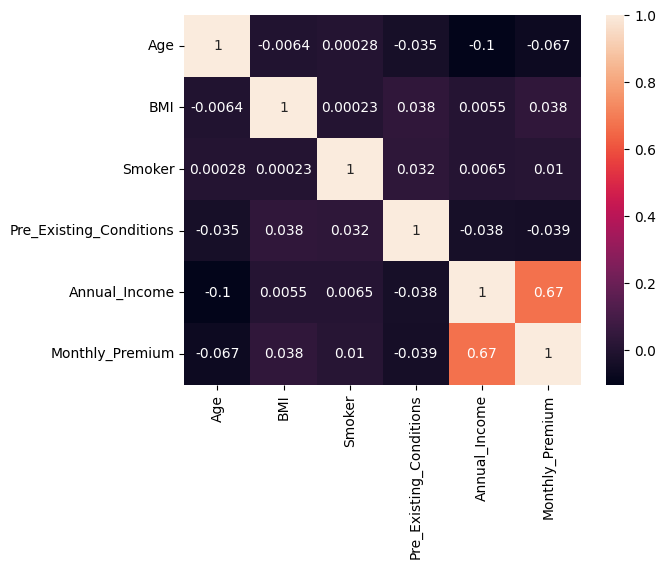

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

print(df.describe())

sns.heatmap(
    df[['Age','BMI','Smoker','Pre_Existing_Conditions',
        'Annual_Income','Monthly_Premium']].corr(),
    annot=True
)
plt.show()


In [21]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)

model.fit(X_train, y_train)

preds = model.predict(X_test)

print(f"R² Score: {r2_score(y_test, preds):.3f}")
print(f"MAE: ₹{mean_absolute_error(y_test, preds):.0f}")


R² Score: 0.360
MAE: ₹205


In [22]:
print(X_test)

     Age   BMI  Smoker  Pre_Existing_Conditions  Annual_Income
521   22  23.8       0                        1         530034
737   23  27.1       1                        0         475044
740   64  28.8       0                        1         679886
660   67  24.3       0                        1         504650
411   59  20.0       1                        0         745814
..   ...   ...     ...                      ...            ...
408   46  21.3       0                        0         506505
332   64  20.4       1                        1         486467
208   22  23.5       0                        1         668887
613   61  27.6       0                        1         700408
78    41  20.3       1                        1         521537

[200 rows x 5 columns]


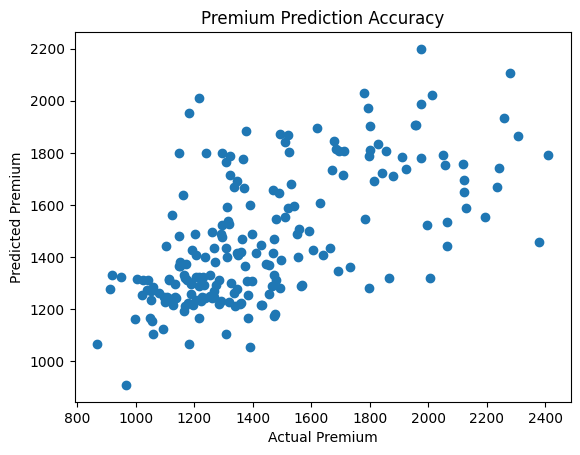

Accuracy within ±10%: 45.00%
Accuracy within ±20%: 74.00%


In [23]:
plt.scatter(y_test, preds)
plt.xlabel("Actual Premium")
plt.ylabel("Predicted Premium")
plt.title("Premium Prediction Accuracy")
plt.show()
import numpy as np

# Absolute percentage error (normal scale)
percentage_error = np.abs(preds - y_test) / y_test

accuracy_10 = np.mean(percentage_error <= 0.10) * 100
accuracy_20 = np.mean(percentage_error <= 0.20) * 100

print(f"Accuracy within ±10%: {accuracy_10:.2f}%")
print(f"Accuracy within ±20%: {accuracy_20:.2f}%")



3 out 4 predicitons are correct, in practical case, and this model is for recommendation  not a final decission maker, so that is good estimation.

In [24]:
def insurance_gap_analysis(
    annual_income,
    family_size,
    existing_cover
):
    required_cover = annual_income * 10 + family_size * annual_income
    gap = required_cover - existing_cover

    if gap <= 0:
        status = "Adequately Insured"
    elif gap < annual_income * 5:
        status = "Moderately Underinsured"
    else:
        status = "Severely Underinsured"

    return required_cover, gap, status


In [25]:
def recommend_insurance_bundle(
    age,
    smoker,
    family_size,
    income
):
    bundle = []

    # Term Insurance
    if age < 40:
        bundle.append("Term Life Insurance (High Cover)")
    else:
        bundle.append("Term Life Insurance (Moderate Cover)")

    # Health Insurance
    if family_size > 2:
        bundle.append("Family Floater Health Insurance")
    else:
        bundle.append("Individual Health Insurance")

    # Government Scheme
    if income < 500000:
        bundle.append("PMJJBY (₹2L Govt Life Cover)")

    # Lifestyle risk
    if smoker == 1:
        bundle.append("Higher Health Cover (Lifestyle Risk)")

    return bundle


In [26]:
import numpy as np

def investment_impact(
    monthly_invest,
    annual_premium,
    years=20,
    rate=0.12,
    invest_type='SIP'
):
    monthly_premium = annual_premium / 12
    adj_invest = max(0, monthly_invest - monthly_premium)
    n = years * 12

    if invest_type == 'SIP':
        fv = adj_invest * ((1 + rate/12)**n - 1) / (rate/12)
    elif invest_type == 'RD':
        fv = adj_invest * n * (1 + rate/12)
    elif invest_type == 'FD':
        fv = adj_invest * ((1 + rate/12)**n)
    else:
        fv = 0

    tax_save = (annual_premium * 0.2) * ((1 + rate)**years)
    return fv + tax_save


In [27]:
def mc_impact(
    monthly_invest,
    annual_premium,
    years=20,
    n_sims=1000,
    invest_type='SIP'
):
    results = []
    for _ in range(n_sims):
        rate = np.random.normal(0.12, 0.02)
        fv = investment_impact(
            monthly_invest, annual_premium, years, rate, invest_type
        )
        results.append(fv)

    return np.mean(results), np.std(results)


In [28]:
# Sample user input
age = 35
bmi = 25
smoker = 0
conditions = 0
income = 600000
family_size = 4
existing_cover = 4000000     # ₹40L
monthly_savings = 5000

# ML Prediction
sample = [[age, bmi, smoker, conditions, income]]
monthly_premium = model.predict(sample)[0]
annual_premium = monthly_premium * 12
print(sample)
print(f"Predicted Monthly Premium: ₹{monthly_premium}")
# Coverage Gap
required, gap, status = insurance_gap_analysis(
    income, family_size, existing_cover
)

# Recommendation
bundle = recommend_insurance_bundle(
    age, smoker, family_size, income
)

# Monte Carlo SIP
mean_sip, std_sip = mc_impact(
    monthly_savings, annual_premium
)

print("----- INSURANCE ANALYSIS -----")
print("Insurance Status:", status)
print("Required Cover: ₹", f"{required:,.0f}")
print("Coverage Gap: ₹", f"{gap:,.0f}")
print("\nRecommended Insurance Bundle:")
for b in bundle:
    print("-", b)

print("\n----- SAVINGS IMPACT -----")
print(f"Predicted Monthly Premium: ₹{monthly_premium:.0f}")
print(f"Mean SIP Corpus: ₹{mean_sip:,.0f}")
print(f"Risk Range: ±₹{std_sip:,.0f}")


[[35, 25, 0, 0, 600000]]
Predicted Monthly Premium: ₹1491.4810791015625
----- INSURANCE ANALYSIS -----
Insurance Status: Severely Underinsured
Required Cover: ₹ 8,400,000
Coverage Gap: ₹ 4,400,000

Recommended Insurance Bundle:
- Term Life Insurance (High Cover)
- Family Floater Health Insurance

----- SAVINGS IMPACT -----
Predicted Monthly Premium: ₹1491
Mean SIP Corpus: ₹3,662,398
Risk Range: ±₹1,023,817


In [29]:
import joblib
joblib.dump(model, 'model.pkl')


['model.pkl']

“We show not only the expected future savings, but also the risk band using Monte Carlo simulation.”